In [274]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize
%matplotlib inline

In [275]:
def Sigmoid(x):
    return 1/(1+np.exp(-x))

In [276]:
path = 'iris.csv'
pdData = pd.read_csv(path, header=0)

In [306]:
dataSelected = pdData[pdData['label'] != 2]
class1 = pdData[pdData['label'] == 0].iloc[:, :4]
class2 = pdData[pdData['label'] == 1].iloc[:, :4]
xMat = np.mat(dataSelected.iloc[:,:4]).T
yMat = np.mat(dataSelected.iloc[:,4])
c1Mat = np.mat(class1)
c2mat = np.mat(class2)
#a = np.mat([1,2,3,4]).reshape(4,1)
#print(a.T * xMat[:, :10])

In [309]:
def J(theta, x = xMat, y = np.array(yMat)):
    theta = np.mat(theta).reshape(4,1)
    temp = theta.T * xMat
    p = np.array(Sigmoid(temp).reshape(1,100))
    return -np.sum(y * np.log(p) + (1-y) * np.log(1-p))/100

In [354]:
# 批量梯度下降
# 形式简单明了，直接将样本矩阵与残差矩阵带入迭代即可
def BGD(initial_guess, x = xMat, y = yMat):
    t = initial_guess
    eta = 1e-2 # 学习率
    maxIter = 1000
    epsilon = 1e-6
    lastError = J(initial_guess)
    print(lastError)
    
    for i in range(maxIter):
        y_pred = np.array(theta * xMat)
        errorMat = y - y_pred
        t = t + eta * np.array((x * errorMat.T).T)[0]
        error = J(theta)
        if np.sum(error - lastError) < epsilon:
            break
        lastError = error
    return theta
    

In [357]:
# theta = optimize.fmin_bfgs(J, [0,0,0,0], disp=False)
theta = BGD([0,0,0,0])
theta

0.6931471805599453


array([-2.59427847, -8.52145325, 12.57345237,  5.45950426])

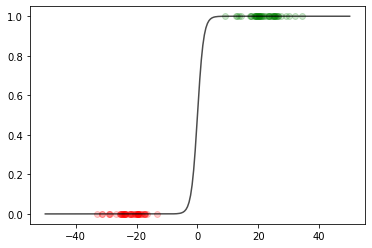

In [358]:

t = np.mat(theta)
temp = np.array(t * xMat)[0]# 降维
pred = Sigmoid(temp)
plt.scatter(temp[0:49], pred[0:49], c='red', alpha=0.2)
plt.scatter(temp[50:99], pred[50:99], c='green', alpha=0.2)
# plt.scatter([temp[100:149]], [pred[100:149]], c='blue', alpha=0.2)
xfit = np.linspace(-50, 50, 200)
plt.plot(xfit, Sigmoid(xfit), c='black', alpha=.7)


In [341]:
b = np.mat(np.linspace(1,100,100))
a = np.mat(np.linspace(1, 400, 400)).reshape(4, 100)
print(a.shape)
print(b.shape)
print(xMat.shape)
(a * b.T).T

(4, 100)
(1, 100)
(4, 100)


matrix([[ 338350.,  843350., 1348350., 1853350.]])